In [20]:
using Pkg
# Pkg.activate(mktempdir())

Pkg.add("Catlab")
using Catlab.Core
using Catlab.GAT
using Catlab.Theories
using Catlab.Syntax
using Catlab.Present	
using Catlab.Programs	
using Catlab.WiringDiagrams
using Catlab.Graphics
using Catlab

Pkg.add("AlgebraicPetri")
using AlgebraicPetri

Pkg.add("AlgebraicRelations")
using AlgebraicRelations.DB
using AlgebraicRelations.Queries
using AlgebraicRelations.Presentations
using AlgebraicRelations.Interface

Pkg.add("TikzPictures")
using TikzPictures

Pkg.add("TikzGraphs")
using TikzGraphs

Pkg.add("LightGraphs")
using LightGraphs

Pkg.add("Convex") 
import Convex

Pkg.add("SCS")
import SCS

Pkg.add("JSON")
import JSON


  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/

In [ ]:
function show_diagram(d::WiringDiagram)
  to_graphviz(d, orientation=LeftToRight, labels=true)
end

In [37]:
const category_theory = {
  id: "cat",
  name: "Category Theory",
  types: [{id:"Ob"}, {id:"Hom", args:[{id:"dom", type: "Ob"}, {id: "codom", type: "Ob"}]}],
  terms: [{ id: "id", args: [{ id: "A", type: "Ob" }], type: { id: "Hom", values: [{ id: "dom", value: "A" }, id:"codom", value: "A"]} }, { id: "compose", args: [{}] }],
  axioms: [],
  operators: [{id: "⋅", term: "compose"}, {id: "→", type: "Hom"}]
}

LoadError: [91msyntax: { } vector syntax is discontinued around In[37]:1[39m

In [31]:
@theory Q{ID,Kind,Instance,Field,Name,Value,Function,Input,Output,Condition,Op} begin

  # Aliases
  @op begin
  end

  # Type Constructors
  ID::TYPE
  Kind::TYPE
  Instance::TYPE
  Field::TYPE
  Name::TYPE
  Value::TYPE
  Function::TYPE
  Input::TYPE
  Output::TYPE
  Condition::TYPE
  Op::TYPE
  
  # Term Constructors
  id()::ID
  id(kind::Kind)::ID
  kind(id::ID)::Kind
  
  # Axioms
end

Q

In [32]:
th = theory(Q)

Catlab.GAT.Theory(Catlab.GAT.TypeConstructor[Catlab.GAT.TypeConstructor(:ID, Symbol[], OrderedCollections.OrderedDict{Symbol,Union{Expr, Symbol}}(), nothing), Catlab.GAT.TypeConstructor(:Kind, Symbol[], OrderedCollections.OrderedDict{Symbol,Union{Expr, Symbol}}(), nothing), Catlab.GAT.TypeConstructor(:Instance, Symbol[], OrderedCollections.OrderedDict{Symbol,Union{Expr, Symbol}}(), nothing), Catlab.GAT.TypeConstructor(:Field, Symbol[], OrderedCollections.OrderedDict{Symbol,Union{Expr, Symbol}}(), nothing), Catlab.GAT.TypeConstructor(:Name, Symbol[], OrderedCollections.OrderedDict{Symbol,Union{Expr, Symbol}}(), nothing), Catlab.GAT.TypeConstructor(:Value, Symbol[], OrderedCollections.OrderedDict{Symbol,Union{Expr, Symbol}}(), nothing), Catlab.GAT.TypeConstructor(:Function, Symbol[], OrderedCollections.OrderedDict{Symbol,Union{Expr, Symbol}}(), nothing), Catlab.GAT.TypeConstructor(:Input, Symbol[], OrderedCollections.OrderedDict{Symbol,Union{Expr, Symbol}}(), nothing), Catlab.GAT.TypeCon

In [35]:
@theory QKnowledge{Question,Answer,Problenm,Solution,Qualification,Quantification} <: Q{ID,Kind,Instance,Field,Name,Value,Function,Input,Output,Condition,Op} begin
  # Types
  Question::Type
  Answer::Type
  Problenm::Type
  Solution::Type
  Qualification::Type
  Quantification::Type

  # Terms
end

LoadError: LoadError: [91mAssertionError: all((param in head.main.params for base = head.base for param = base.params))[39m
in expression starting at In[35]:1

In [27]:
@present Knowledge(FreeCartesianClosedCategory) begin
  
  (Question, Answer, Context, Kind, Condition)::Ob

  answers::Hom(Context⊗Question,Answer)
  questions::Hom(Context⊗Answer,Question)
  circumstances::Hom(Question⊗Answer,Context)
  inferences::Hom(Context,Question⊗Answer)

end

Presentation{CartesianClosedCategory,Symbol}(Catlab.Theories.FreeCartesianClosedCategory, (Ob = Catlab.Theories.FreeCartesianClosedCategory.Ob{:generator}[Question, Answer, Context, Kind, Condition], Hom = Catlab.Theories.FreeCartesianClosedCategory.Hom{:generator}[answers, questions, circumstances, inferences]), Dict(:Context => (:Ob => 3),:inferences => (:Hom => 4),:answers => (:Hom => 1),:questions => (:Hom => 2),:Question => (:Ob => 1),:circumstances => (:Hom => 3),:Kind => (:Ob => 4),:Condition => (:Ob => 5),:Answer => (:Ob => 2)), Pair[])

In [ ]:
crossexposure = @program EpiCrossExposure (s::S, e::E, i::I, i2::I2, a::A, r::R, r2::R2, d::D,
                                           s′::S′, e′::E′, i′::I′, i2′::I2′, a′::A′, r′::R′, r2′::R2′, d′::D′) begin
    e_2 = exposure_i(s, i′)
    e_3 = exposure_i2(s, i2′)
    e_4 = exposure_a(s, a′)
    e_5 = exposure_e(s, e′)
    e_all = [e, e_2, e_3, e_4, e_5]
    e′_2 = exposure_i′(s′, i)
    e′_3 = exposure_i2′(s′, i2)
    e′_4 = exposure_a′(s′, a)
    e′_5 = exposure_e′(s′, e_all)
    e′_all = [e′, e′_2, e′_3, e′_4, e′_5]
    return s, e_all, i, i2, a, r, r2, d,
           s′, e′_all, i′, i2′, a′, r′, r2′, d′
end

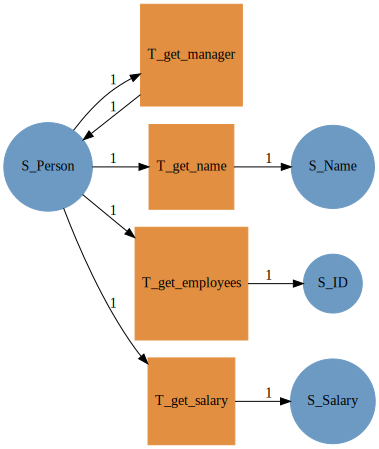

In [24]:
# Initialize presentation object
present = Presentation()

# Add types to presentation
Context, Question, Answer,
ContextQuestion, ContextAnswer, QuestionAnswer,
Kind, Condition, ID = add_types!(present, [
                                          (:Context, String),
                                          (:Question, String),
                                          (:Answer, String),
                                          (:ContextQuestion, String),
                                          (:ContextAnswer, String),
                                          (:QuestionAnswer, String),
                                          (:Kind, String),
                                          (:Condition, String),
                                          (:ID, string)]);

# Add Processes to presentation
given_context_and_question_what_is_answer, given_context_and_answer_what_is_question,
given_question_and_answer_what_is_context, given context_what_is_question_and_answer,
project_context_from_context_question, project_question_from_context_question,
project_context_from_context_question,

get_question_context, get_answer_context, get_question_answer = add_processes!(present, [(:answer, Person, ID),
                                                (:get_manager, Person, Person),
                                                (:get_salary, Person, Salary),
                                                (:get_name, Person, Name)]);


Workplace = present_to_schema(present)
schema = Workplace();
draw_schema(present)

- answers: (Context x Question) -> Answer
- questions: (Context x Answer) -> Question
- circumstances: (Question x Answer) -> Context
- inferences: Context -> (Question x Answer)

In [2]:
@present EpiCrossExposure(FreeBiproductCategory) begin
    (S, E, A, I, I2, R, R2, D)::Ob
    (S′, E′, A′, I′, I2′, R′, R2′, D′)::Ob

    exposure_i::Hom(S⊗I′,E)
    exposure_e::Hom(S⊗E′,E)
    exposure_a::Hom(S⊗A′,E)
    exposure_i2::Hom(S⊗I2′,E)
    exposure_i′::Hom(S′⊗I,E′)
    exposure_e′::Hom(S′⊗E,E′)
    exposure_a′::Hom(S′⊗A,E′)
    exposure_i2′::Hom(S′⊗I2,E′)
end;


In [3]:
crossexposure = @program EpiCrossExposure (s::S, e::E, i::I, i2::I2, a::A, r::R, r2::R2, d::D,
                                           s′::S′, e′::E′, i′::I′, i2′::I2′, a′::A′, r′::R′, r2′::R2′, d′::D′) begin
    e_2 = exposure_i(s, i′)
    e_3 = exposure_i2(s, i2′)
    e_4 = exposure_a(s, a′)
    e_5 = exposure_e(s, e′)
    e_all = [e, e_2, e_3, e_4, e_5]
    e′_2 = exposure_i′(s′, i)
    e′_3 = exposure_i2′(s′, i2)
    e′_4 = exposure_a′(s′, a)
    e′_5 = exposure_e′(s′, e_all)
    e′_all = [e′, e′_2, e′_3, e′_4, e′_5]
    return s, e_all, i, i2, a, r, r2, d,
           s′, e′_all, i′, i2′, a′, r′, r2′, d′
end

WiringDiagram{BiproductCategory}([:S,:E,:I,:I2,:A,:R,:R2,:D,:S′,:E′,:I′,:I2′,:A′,:R′,:R2′,:D′], [:S,:E,:I,:I2,:A,:R,:R2,:D,:S′,:E′,:I′,:I2′,:A′,:R′,:R2′,:D′], 
[ -2 => {inputs},
  -1 => {outputs},
  1 => Box(:exposure_i, [:S,:I′], [:E]),
  2 => Box(:exposure_i2, [:S,:I2′], [:E]),
  3 => Box(:exposure_a, [:S,:A′], [:E]),
  4 => Box(:exposure_e, [:S,:E′], [:E]),
  5 => Box(:exposure_i′, [:S′,:I], [:E′]),
  6 => Box(:exposure_i2′, [:S′,:I2], [:E′]),
  7 => Box(:exposure_a′, [:S′,:A], [:E′]),
  8 => Box(:exposure_e′, [:S′,:E], [:E′]) ],
[ Wire((-2,1) => (-1,1)),
  Wire((-2,2) => (-1,2)),
  Wire((-2,3) => (-1,3)),
  Wire((-2,4) => (-1,4)),
  Wire((-2,5) => (-1,5)),
  Wire((-2,6) => (-1,6)),
  Wire((-2,7) => (-1,7)),
  Wire((-2,8) => (-1,8)),
  Wire((-2,9) => (-1,9)),
  Wire((-2,10) => (-1,10)),
  Wire((-2,11) => (-1,11)),
  Wire((-2,12) => (-1,12)),
  Wire((-2,13) => (-1,13)),
  Wire((-2,14) => (-1,14)),
  Wire((-2,15) => (-1,15)),
  Wire((-2,16) => (-1,16)),
  Wire((-2,1) => (1,1)),
  Wire